In [1]:
import os

# Function to create a directory if it doesn't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [2]:
base_dir = 'data_zomato'
create_directory(base_dir)

train_dir = os.path.join(base_dir,'train')
create_directory(train_dir)
test_dir = os.path.join(base_dir,'test')
create_directory(test_dir)

train_zomato_dir = os.path.join(train_dir,'zomato')
create_directory(train_zomato_dir)
test_zomato_dir = os.path.join(test_dir,'zomato')
create_directory(test_zomato_dir)

train_others_dir = os.path.join(train_dir,'others')
create_directory(train_others_dir)
test_others_dir = os.path.join(test_dir,'others')
create_directory(test_others_dir)

In [9]:
import shutil
base = os.getcwd()
original_dir_zomato = os.path.join(base,'images/zomato')
original_dir_others = os.path.join(base,'images/person')

fnames = ['image_{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dir_zomato, fname)
    dst = os.path.join(train_zomato_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['person_{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dir_others, fname)
    dst = os.path.join(train_others_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['image_{}.jpg'.format(i) for i in range(500,600)]
for fname in fnames:
    src = os.path.join(original_dir_zomato, fname)
    dst = os.path.join(test_zomato_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['person_{}.jpg'.format(i) for i in range(500,600)]
for fname in fnames:
    src = os.path.join(original_dir_others, fname)
    dst = os.path.join(test_others_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training zomato images:', len(os.listdir(train_zomato_dir)))
print('total test zomato images:', len(os.listdir(test_zomato_dir)))

total training zomato images: 500
total test zomato images: 100


2024-01-09 00:02:46.723323: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


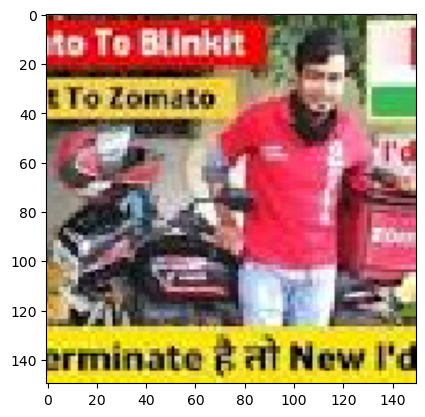

In [4]:
#displaying test picture
img_path = train_zomato_dir+'/image_15.jpg'
import keras.utils as image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [5]:
import tensorflow as tf
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

/Users/prabhatvashishth/Desktop/Projects/Havells/rec/lib/python3.11/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir , target_size = (150,150),
                                                   batch_size = 20, class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir , target_size = (150,150),
                                                   batch_size = 20, class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


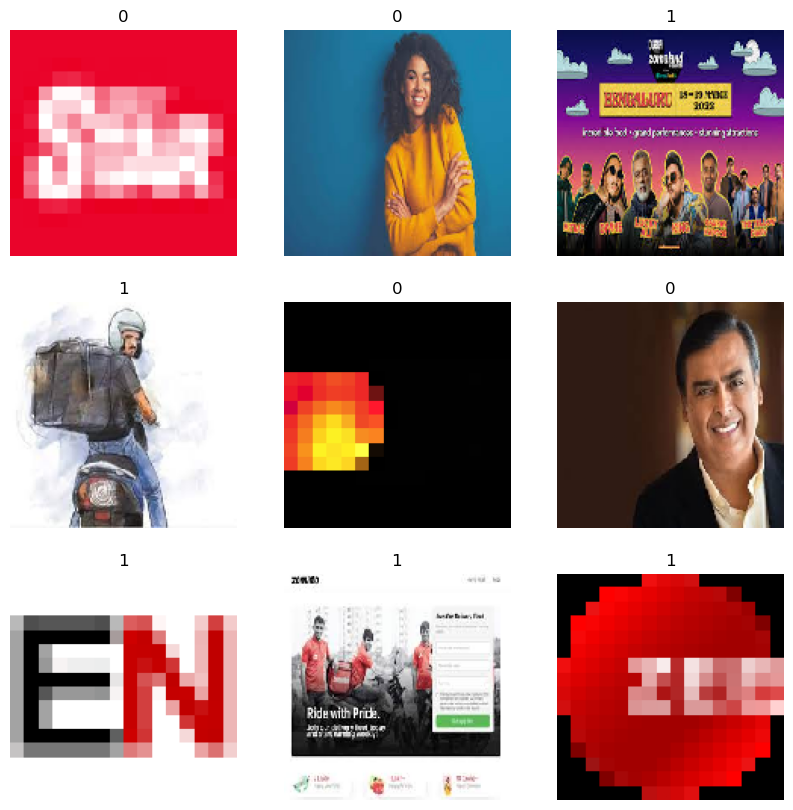

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data_batch[i])
    plt.title(int(labels_batch[i]))
    plt.axis("off")

In [56]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
    validation_data=test_generator,
      validation_steps=10)

Epoch 1/50


2024-01-09 01:03:30.001126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - ETA: 0s - loss: 0.0841 - acc: 0.9775

2024-01-09 01:03:41.130935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 13s 639ms/step - loss: 0.0841 - acc: 0.9775 - val_loss: 1.0989 - val_acc: 0.7250
Epoch 2/50
20/20 [==============================] - 13s 644ms/step - loss: 0.0549 - acc: 0.9800 - val_loss: 1.1512 - val_acc: 0.7350
Epoch 3/50
20/20 [==============================] - 13s 648ms/step - loss: 0.1060 - acc: 0.9575 - val_loss: 0.9876 - val_acc: 0.7450
Epoch 4/50
20/20 [==============================] - 12s 617ms/step - loss: 0.0969 - acc: 0.9575 - val_loss: 1.0677 - val_acc: 0.7150
Epoch 5/50
20/20 [==============================] - 12s 623ms/step - loss: 0.0702 - acc: 0.9725 - val_loss: 1.0801 - val_acc: 0.7150
Epoch 6/50
20/20 [==============================] - 13s 642ms/step - loss: 0.0907 - acc: 0.9550 - val_loss: 1.1600 - val_acc: 0.7150
Epoch 7/50
20/20 [==============================] - 14s 689ms/step - loss: 0.0793 - acc: 0.9675 - val_loss: 1.1228 - val_acc: 0.7450
Epoch 8/50
20/20 [==============================] - 13s 631ms/step - loss: 0.068

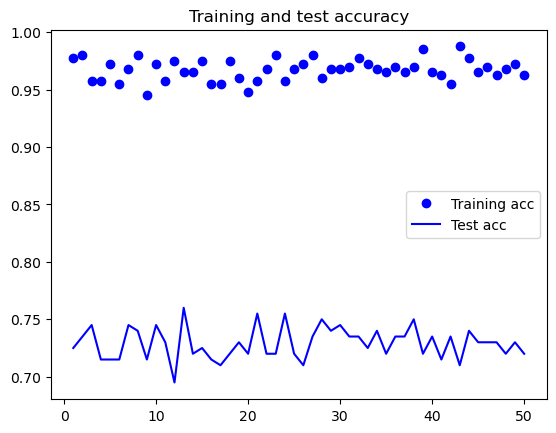

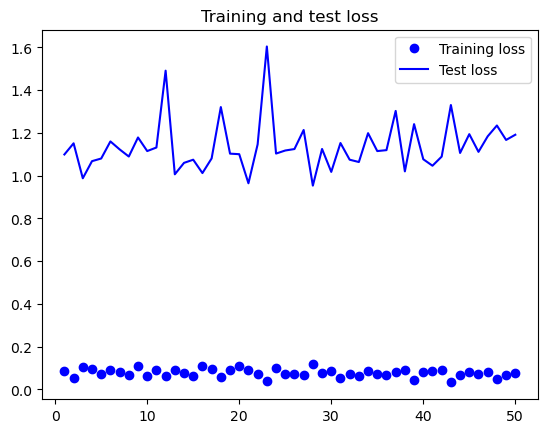

In [57]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

In [58]:
model.save('img_rec_zomato.h5')

1/1 [==============================] - 0s 21ms/step


'zomato_delivery_boy'

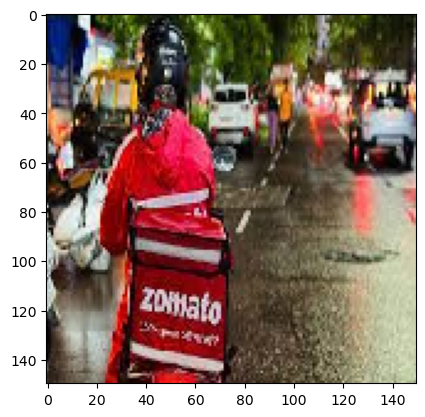

In [59]:
img = image.load_img("static/image_506.jpg", target_size=(150, 150)) 
plt.imshow(img)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

predictions = model.predict(img_tensor)
p = {1:'zomato_delivery_boy',0:'others'}
p[round(predictions[0][0])]